# Iris Flower Dataset

### Machine Learning model that can detect types of Iris plant using scikit-learn

see: https://en.wikipedia.org/wiki/Iris_flower_data_set

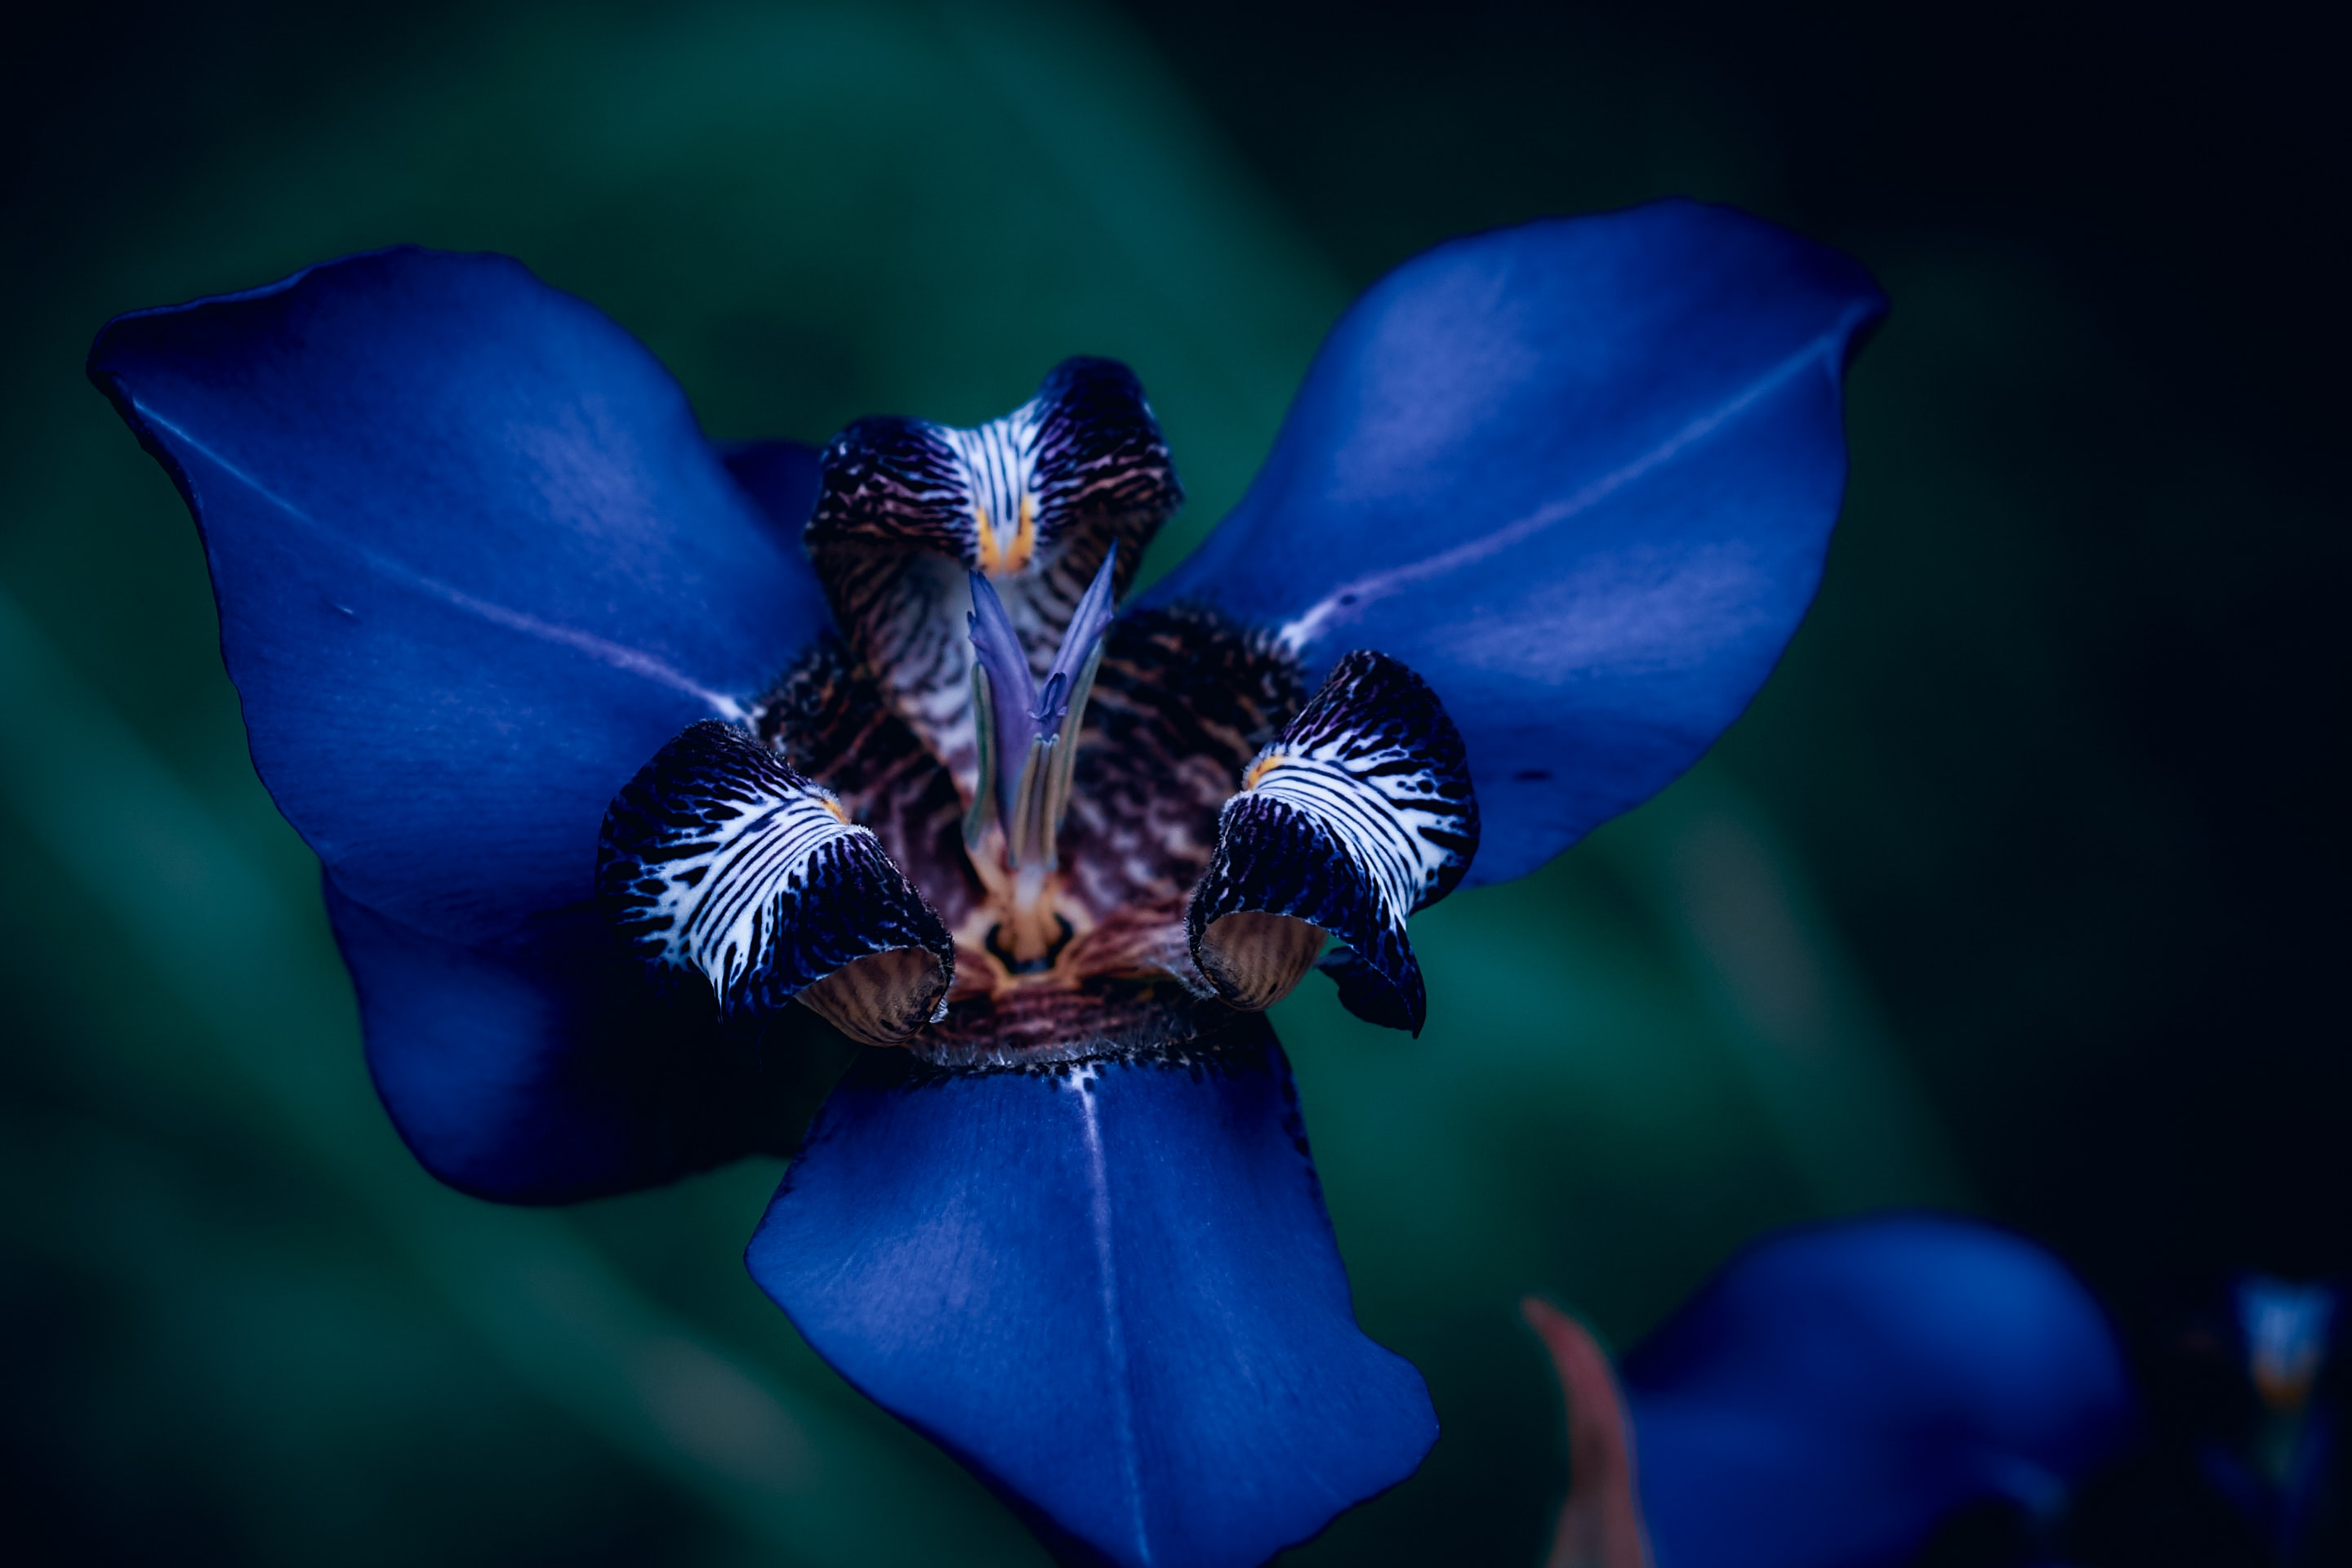

In [1]:
from IPython.display import Image
Image("iris_flower.jpg")

# 1) Import the data

In [2]:
from sklearn.datasets import load_iris
iris = load_iris() # data is already clean

# 2) Split the data into training set/test set

In [3]:
# store the feature matrix (X): input,  and response vector (y): output (pre labeled answers)
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names


print("Feature names:", feature_names) 
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


# 3) Create a model

In [5]:
#KNN Classifier.
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Decision Tree
# from sklearn.tree import DecisionTreeClassifier 
# knn = DecisionTreeClassifier() 
# knn.fit(X_train, y_train) 


# 4) Check the output

In [6]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [7]:
sample = [[3,5,4,2], [2,3,5,4]]
predictions = knn.predict(sample)
pred_species = [iris.target_names[p] for p in predictions]
print("predictions: ", pred_species)

predictions:  ['versicolor', 'virginica']


### Save the model

In [8]:
from sklearn.externals import joblib
model = joblib.dump(knn, 'mlbrain.joblib')

/home/gabriel/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# instead of training the model again:
# model = joblib.load('mlbrain.joblib')
# model.predict(X_test)

# Visualize the data

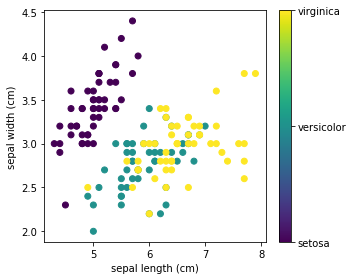

In [10]:
from sklearn.datasets import load_iris 
iris = load_iris() 
import matplotlib.pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# colorbar with the Iris target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

#chart configurations
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()